###  Implementing MultiLayer Neural Network from scratch using pyTorch

In [3]:
# Importing the libraries
import torch
import torch.nn as nn
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [5]:
# Checking device availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [13]:
# Load data
train_dataset = datasets.MNIST(root = './Data', train = True, transform = transforms.ToTensor(), download = True)

test_dataset = datasets.MNIST(root = './Data', train = False, transform = transforms.ToTensor())

In [36]:
# Hyper parameters

batch_size = 100
learning_rate = 0.001
input_size = 784 # 28 * 28 --> Image pixels
hidden_size = 100
n_classes = 10
num_epochs  = 10

In [27]:
# Loading dataset using data loader
train_loader = DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True )
test_loader = DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = False)

In [32]:
# Size of the samples and labels
examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape) # samples shape is 100, 1, 28, 28 which is 100 samples, 1 channel, 28 * 28 pixels
# labels shape is 100, which is 100 labels

torch.Size([100, 1, 28, 28]) torch.Size([100])


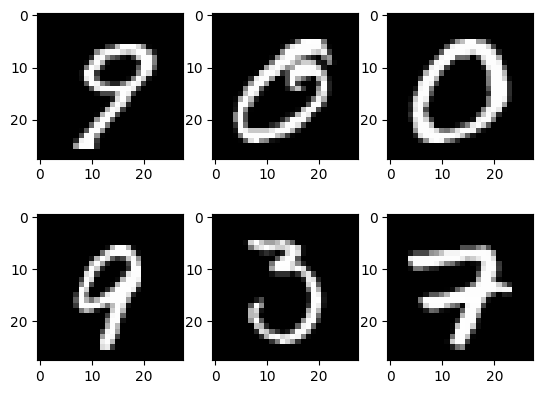

In [33]:
# Visualizing the data samples
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0], cmap = 'gray')

plt.show()

In [51]:
# Implementing the Neural Network

class NeuralNet(nn.Module):

    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNet,self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size,output_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size,output_size)
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

model = NeuralNet(input_size, hidden_size, output_size=n_classes).to(device)


# Loss and Optimiser
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)


# Training loop
n_totalsteps = len(train_loader)

for epoch in range(num_epochs):

    for i, (images, labels) in enumerate(train_loader):
        #  Reshape the images because the model expects a 1D tensor as input
        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)

        # Forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_totalsteps}], Loss: {loss.item():.4f}')


# Test

with torch.no_grad():
    n_correct = 0
    n_samples = 0

    for images, labels in test_loader:
        images = images.reshape(-1,28*28).to(device)
        lables = labels.to(device)
        output = model(images)

        _ , predictions = torch.max(output,1)
        n_samples = labels.shape[0]

        n_correct = (predictions == labels).sum().item()
    
    acc = (n_correct / n_samples) * 100

    print(f'Accuracy of the model : {acc}')


Epoch [1/10], Step [100/600], Loss: 0.3880
Epoch [1/10], Step [200/600], Loss: 0.3228
Epoch [1/10], Step [300/600], Loss: 0.3209
Epoch [1/10], Step [400/600], Loss: 0.2110
Epoch [1/10], Step [500/600], Loss: 0.3666
Epoch [1/10], Step [600/600], Loss: 0.2423
Epoch [2/10], Step [100/600], Loss: 0.2128
Epoch [2/10], Step [200/600], Loss: 0.1472
Epoch [2/10], Step [300/600], Loss: 0.1999
Epoch [2/10], Step [400/600], Loss: 0.3084
Epoch [2/10], Step [500/600], Loss: 0.1768
Epoch [2/10], Step [600/600], Loss: 0.2198
Epoch [3/10], Step [100/600], Loss: 0.1454
Epoch [3/10], Step [200/600], Loss: 0.1805
Epoch [3/10], Step [300/600], Loss: 0.1220
Epoch [3/10], Step [400/600], Loss: 0.1140
Epoch [3/10], Step [500/600], Loss: 0.1966
Epoch [3/10], Step [600/600], Loss: 0.1099
Epoch [4/10], Step [100/600], Loss: 0.1264
Epoch [4/10], Step [200/600], Loss: 0.1621
Epoch [4/10], Step [300/600], Loss: 0.1012
Epoch [4/10], Step [400/600], Loss: 0.1095
Epoch [4/10], Step [500/600], Loss: 0.0717
Epoch [4/10